In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('gateway.jpg', 0) 

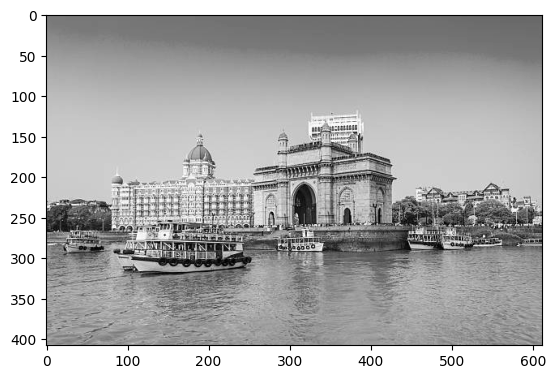

In [ ]:
plt.imshow(img,cmap="gray")

In [ ]:
img.shape

(408, 612)

Making Guassian matrix and adding

In [ ]:
gn_noise=np.zeros((408,612),dtype=np.uint8)
cv2.randn(gn_noise,128,20)
gn_noise=(gn_noise*0.5).astype(np.uint8)
gn_img=cv2.add(img,gn_noise)


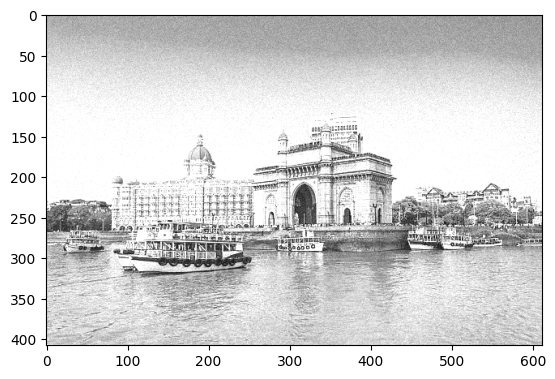

In [ ]:
plt.imshow(gn_img,cmap="gray")

In [ ]:
filter=np.array([[1/9 for i in range(3)]for j in  range (3)])
filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [ ]:
filter.shape

(3, 3)

In [ ]:
gn_img.shape

(408, 612)

In [ ]:
output=[]
for r in range(gn_img.shape[0]-2):
  temp=[]
  for c in range(gn_img.shape[1]-2):
    ans=0
    lhs=gn_img[r:r+3,c:c+3]
    for r_f in range(filter.shape[0]):
      for c_f in range(filter.shape[1]):
        ans+=lhs[r_f][c_f] * filter[r_f][c_f]
    temp.append(ans)
  output.append(temp)
output=np.array(output)

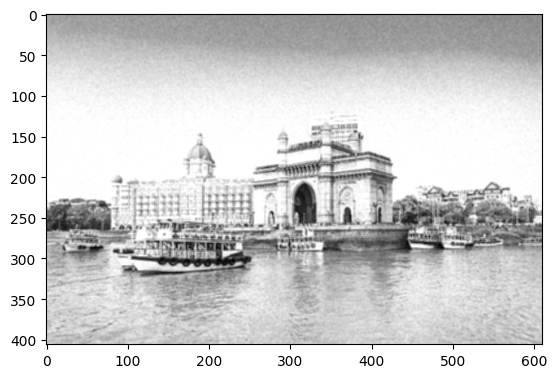

In [ ]:
plt.imshow(output, cmap='gray')

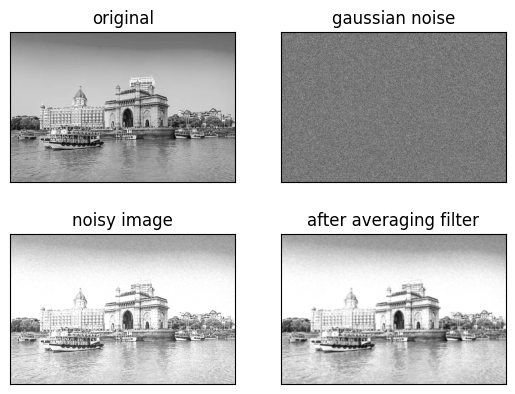

In [ ]:

plt.subplot(2,2,1)
plt.title('original')
plt.xticks([])
plt.yticks([])
plt.imshow(img,cmap="gray")

plt.subplot(2,2,2)
plt.title('gaussian noise')
plt.xticks([])
plt.yticks([])
plt.imshow(gn_noise,cmap="gray")


plt.subplot(2,2,3)
plt.title('noisy image')
plt.xticks([])
plt.yticks([])
plt.imshow(gn_img,cmap="gray")


plt.subplot(2,2,4)
plt.title('after averaging filter')
plt.xticks([])
plt.yticks([])
plt.imshow(output,cmap="gray")

plt.show()

Salt and Pepper Noise

In [ ]:
import random 
salt_and_pepper_img = img.copy()

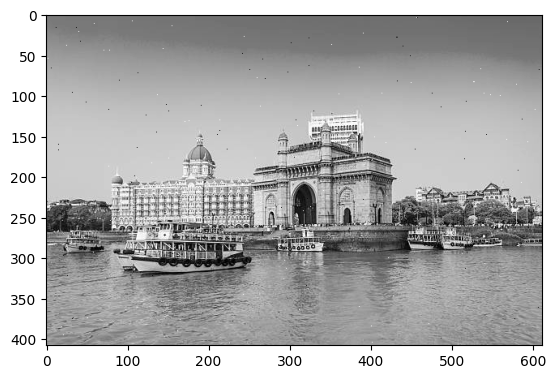

In [ ]:
for i in range(201):
  row= random.randint(0,img.shape[0]-1)
  col= random.randint(0,img.shape[1]-1)
  n=random.randint(0,1)
  if n==0:
    salt_and_pepper_img[row][col]=0
  else:
    salt_and_pepper_img[row][col]=255

plt.imshow(salt_and_pepper_img, cmap='gray')

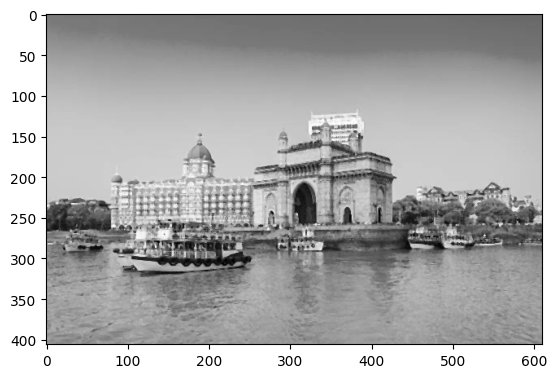

In [ ]:
output=[]
for r in range(salt_and_pepper_img.shape[0]-2):
  temp=[]
  for c in range(salt_and_pepper_img.shape[1]-2):
    lhs=salt_and_pepper_img[r:r+3,c:c+3]
    lhs=lhs.flatten()
    lhs.sort()
    temp.append(lhs[4])
  output.append(temp)

plt.imshow(output,cmap="gray")

High Pass filter

In [ ]:
hp_filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

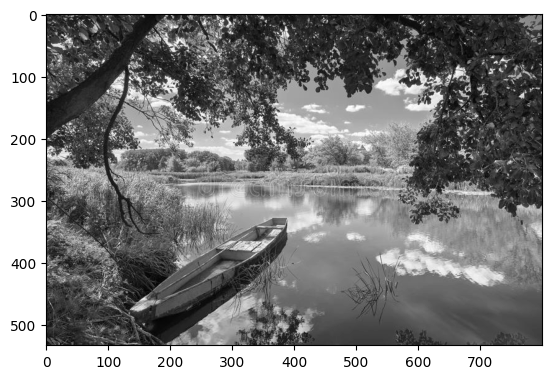

In [ ]:
img2=cv2.imread("6.jpg",0)
plt.imshow(img2,cmap="gray")

In [ ]:
output2=[]
for r in range(img2.shape[0]-2):
  temp=[]
  for c in range(img2.shape[1]-2):
    ans2=0
    lhs=img2[r:r+3,c:c+3]
    for r_f in range(hp_filter.shape[0]):
      for c_f in range(hp_filter.shape[1]):
        ans2+= lhs[r_f][c_f] * hp_filter[r_f][c_f]
    temp.append(ans2)
  output2.append(temp)

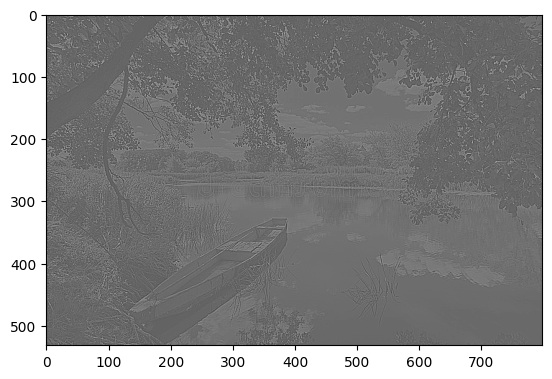

In [ ]:
plt.imshow(output2,cmap="gray")

HighBoost Filter

In [ ]:
filter_hb = np.array([[-1, -1, -1], [-1, 8.9, -1], [-1, -1, -1]])

In [ ]:
output_hb = []
for r in range(img2.shape[0]-2): 
  temp = []
  for c in range(img2.shape[1]-2):
    lhs = img2[r:r+3, c:c+3]
    ans = 0 
    for r_f in range(filter_hb.shape[0]): 
      for c_f in range(filter_hb.shape[1]):
        ans += lhs[r_f][c_f]*filter_hb[r_f][c_f] 
    temp.append(ans) 
  output_hb.append(temp)

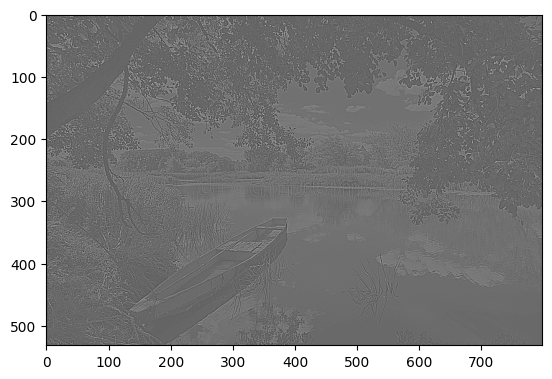

In [ ]:
plt.imshow(output_hb,cmap="gray")